In [1]:
# The first three hand calculated values with given theta = 1, u0 = 1, dt = 0.3
import numpy as np
import matplotlib.pyplot as plt
def theta_rule(u0, lmda, tend, dt, theta):
    """
    Function for solving u' = \lambda u, u(0)= u0, on [0, tend] with steps of dt.
    """
    N = int(tend/dt)              # number of time intervals
    tend = N*dt                   # adjust tend  to fit time step dt
    u = np.zeros(N+1)             # array of u[k] values
    t = np.linspace(0, tend, N+1) # time mesh    
    u[0] = u0                     # assign the initial condition
    for k in range(0, N):
        u[k+1] = (1+(1-theta)*lmda*dt)/(1-theta*lmda*dt)*u[k]
    return u, t

# Exact solution
def u_exact(t, u0, lmda):
    return u0*np.exp(lmda*t)

u1= []
u2= []
u3= []

def test_theta_rule_three_steps():
    """
    Compare three steps with known manual computations.
    """
    theta = 1; lmda = -1; u0 =1; dt = 0.3
    
    u_by_hand = np.array([u0, u1, u2, u3])    
    N = 3 # number of time steps
    u, t = theta_rule(u0=u0, lmda=lmda, tend = N*dt, dt=dt, theta=theta)
    tol = 1E-15 # tolerance for coparing floats
    diff = abs(u-u_by_hand).max()
    success = diff<tol
    assert success

theta   dt     error


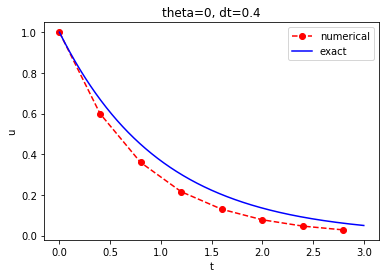

 0.0   0.40:    1.127E-01


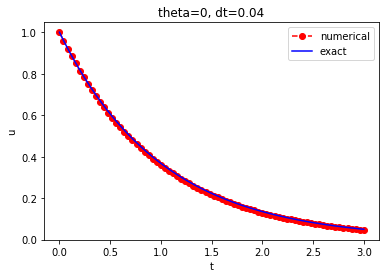

 0.0   0.04:    9.823E-03


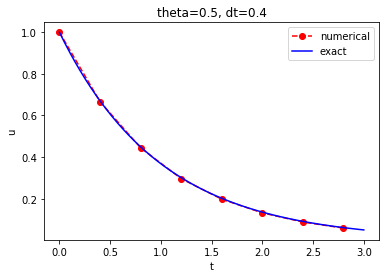

 0.5   0.40:    6.552E-03


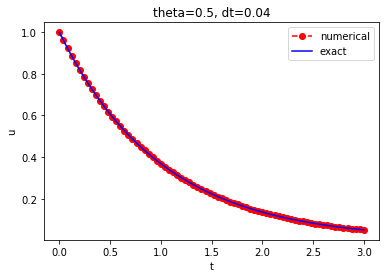

 0.5   0.04:    6.464E-05


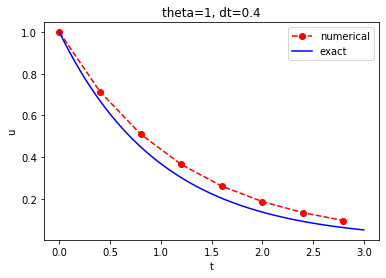

 1.0   0.40:    8.612E-02


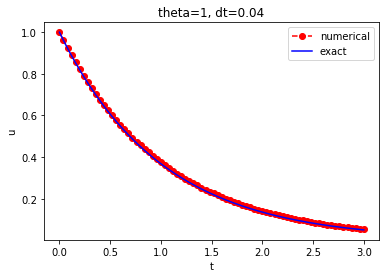

 1.0   0.04:    9.570E-03


In [2]:
# Experiments with Computing and Plotting
def experiment(u0, lmda, tend, dt, theta = 0.5, makeplot =True):
    """
    Run a case with the solver, compute error measure, and plot the numerical
    and exact solutions (if makeplot = True).
    """
    u, t = theta_rule(u0, lmda, tend, dt, theta)      # Numerical solution
    u_e = u_exact(t, u0, lmda)
    e = u_e-u
    E = np.sqrt(dt*sum(e**2))
    if makeplot:
        plt.figure()            #create new plot
        t_e = np.linspace(0, tend, 1001) # fine mesh for u_e
        u_e = u_exact(t_e, u0, lmda)
        plt.plot(t, u, 'r--o')            # red dashes w/circles
        plt.plot(t_e, u_e, 'b-')          # blue line for exact sol.
        plt.legend(['numerical', 'exact'])
        plt.xlabel('t')
        plt.ylabel('u')
        plt.title('theta=%g, dt=%g' %(theta, dt))
        theta2name = {0: 'FE', 1: 'BE', 0.5: 'CN'}
        plt.savefig('%s_%g.png' % (theta2name[theta], dt))
        plt.savefig('%s_%g.pdf' % (theta2name[theta], dt))
        plt.show()
    return E

def main(u0, lmda, tend, dt_values, theta_values =(0, 0.5, 1)):
    print('theta   dt     error')     # Column in table
    for theta in theta_values:
        for dt in dt_values:
            E = experiment(u0, lmda, tend, dt, theta, makeplot= True)
            print ('%4.1f %6.2f: %12.3E' % (theta, dt, E))
u0 = 1
lmda = -1
tend = 3
main(u0, lmda, tend, dt_values= [0.4,0.04])
    